# Import libraries

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot_2samples
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.stats import mannwhitneyu
from statsmodels.stats.multitest import multipletests
from matplotlib.colors import LogNorm
from statannot import add_stat_annotation
import itertools
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

# Read in data files
Dataset for 2D simulation is stored in variable dataset2D

Dataset for 3D simulation is stored in variable dataset3D

Experimental data is stored in variable realData

In [12]:
dataset2D = pd.read_csv("qq_exptData/QQ_output_dim2.csv", header=None, names=['simNum', 'ntarget','minDist'])
dataset3D = pd.read_csv("qq_exptData/QQ_output_dim3.csv", header=None, names=['simNum', 'ntarget','minDist'])
realData = pd.read_csv("qq_exptData/experimentalMeasurements.csv", header=None, names=['minDist'])

## Define font sizes

In [20]:
BIGFONT = {
            'color':  'black',
            'weight': 'normal',
            'size': 30,
            }
MIDFONT = {
            'color':  'black',
            'weight': 'normal',
            'size': 25,
            }
SMALLFONT = {
            'color':  'black',
            'weight': 'normal',
            'size': 20,
            }
BIGFONTSIZE = 20
MIDFONTSIZE = 15
SMALLFONTSIZE = 12

# Generate QQ plots for simulation data versus experimental data.
QQ plots are generated for each number of ERMES spots and referenced against the experimental dataset.

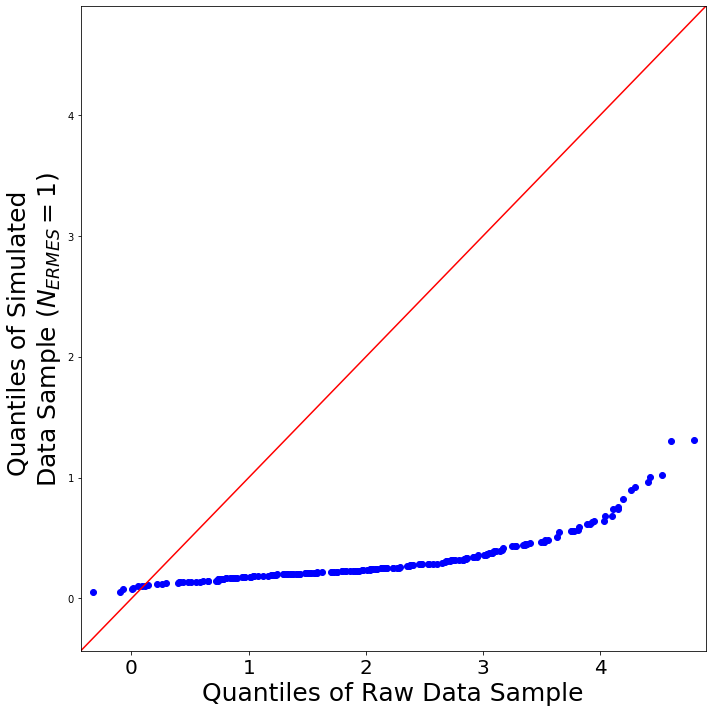

In [21]:
def plotQQ(dataset, nTarget):
    '''Given a dataset (2D, 3D), plot QQ plot against realData
    Parameters
    ==========
    dataset (pd.DataFrame) : dataset to be comparing against realData
    nTarget (pd.DataFrame) : number of ERMES spots used in simulation to be compared against
    '''
    
    pp_y = sm.ProbPlot(dataset[dataset['ntarget'] == nTarget]['minDist'])
    pp_x = sm.ProbPlot(realData['minDist'])
    
    qqplot_2samples(pp_x, pp_y, line = '45')
    mpl.rc("figure", figsize=(10,10))
    plt.xlabel('Quantiles of Raw Data Sample', fontsize = 25)
    plt.ylabel(f'Quantiles of Simulated \nData Sample ($N_{{ERMES}} = {nTarget}$)', fontsize = 25)
    plt.xticks(fontsize = 20)
    plt.show()
    

plotQQ(dataset2D, 1)

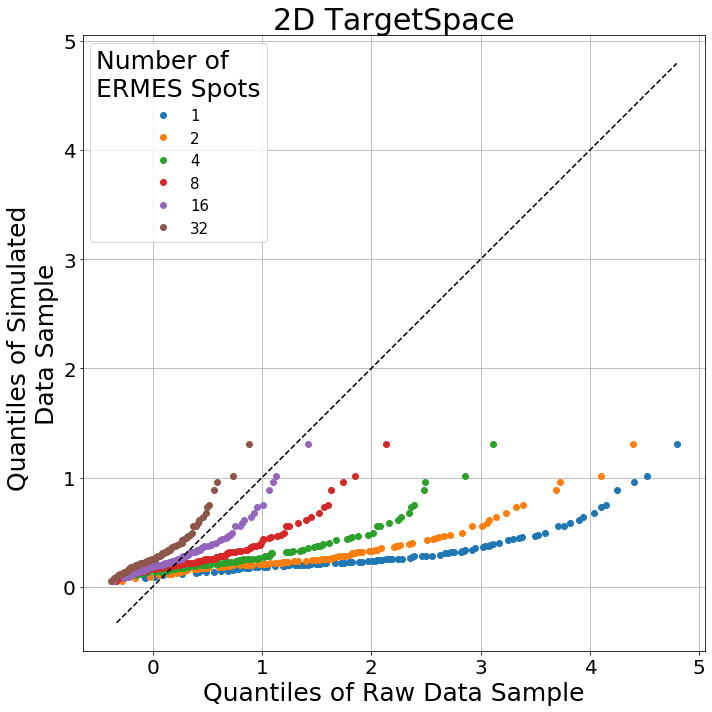

In [22]:
y_1 = dataset2D[dataset2D['ntarget'] == 1]['minDist']
y_2 = dataset2D[dataset2D['ntarget'] == 2]['minDist']
y_4 = dataset2D[dataset2D['ntarget'] == 4]['minDist']
y_8 = dataset2D[dataset2D['ntarget'] == 8]['minDist']
y_16 = dataset2D[dataset2D['ntarget'] == 16]['minDist']
y_32 = dataset2D[dataset2D['ntarget'] == 32]['minDist']
x = realData['minDist']

percs = np.linspace(0,100,100)
qn_y1 = np.percentile(y_1, percs)
qn_y2 = np.percentile(y_2, percs)
qn_y4 = np.percentile(y_4, percs)
qn_y8 = np.percentile(y_8, percs)
qn_y16 = np.percentile(y_16, percs)
qn_y32 = np.percentile(y_32, percs)
qn_x = np.percentile(x, percs)

plt.plot(qn_y1,qn_x, ls="", marker="o", label = '1')
plt.plot(qn_y2,qn_x, ls="", marker="o", label = '2')
plt.plot(qn_y4,qn_x, ls="", marker="o", label = '4')
plt.plot(qn_y8,qn_x, ls="", marker="o", label = '8')
plt.plot(qn_y16,qn_x, ls="", marker="o", label = '16')
plt.plot(qn_y32,qn_x, ls="", marker="o", label = '32')

x = np.linspace(np.min((qn_y1.min(),x.min())), np.max((qn_y1.max(),x.max())))
plt.plot(x,x, color="k", ls="--")
plt.xlabel('Quantiles of Raw Data Sample', fontsize = 25)
plt.ylabel('Quantiles of Simulated \nData Sample', fontsize = 25)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(title="Number of \nERMES Spots",fontsize=15, fancybox=True, title_fontsize = 25)
plt.title('2D TargetSpace', fontsize = 30)
plt.grid()


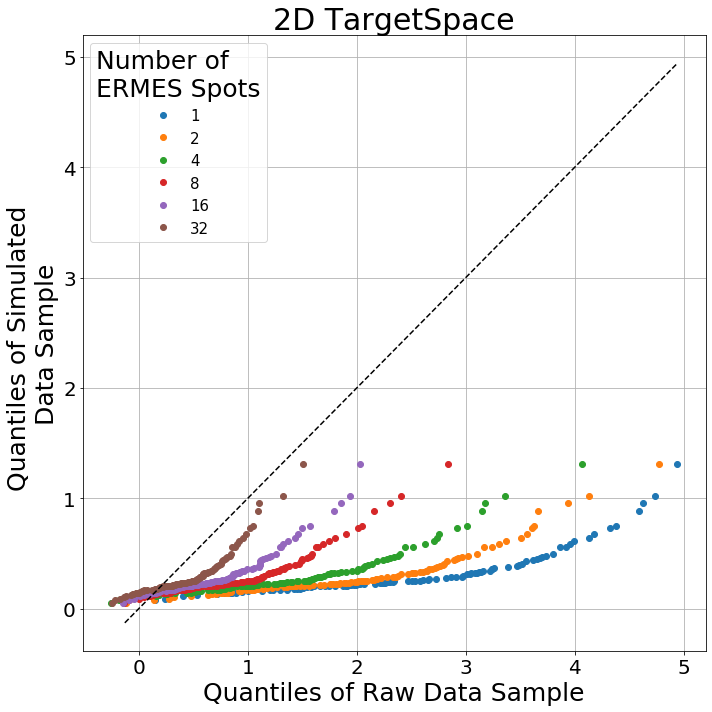

In [23]:
y_1 = dataset3D[dataset3D['ntarget'] == 1]['minDist']
y_2 = dataset3D[dataset3D['ntarget'] == 2]['minDist']
y_4 = dataset3D[dataset3D['ntarget'] == 4]['minDist']
y_8 = dataset3D[dataset3D['ntarget'] == 8]['minDist']
y_16 = dataset3D[dataset3D['ntarget'] == 16]['minDist']
y_32 = dataset3D[dataset3D['ntarget'] == 32]['minDist']
x = realData['minDist']

percs = np.linspace(0,100,100)
qn_y1 = np.percentile(y_1, percs)
qn_y2 = np.percentile(y_2, percs)
qn_y4 = np.percentile(y_4, percs)
qn_y8 = np.percentile(y_8, percs)
qn_y16 = np.percentile(y_16, percs)
qn_y32 = np.percentile(y_32, percs)
qn_x = np.percentile(x, percs)

plt.plot(qn_y1,qn_x, ls="", marker="o", label = '1')
plt.plot(qn_y2,qn_x, ls="", marker="o", label = '2')
plt.plot(qn_y4,qn_x, ls="", marker="o", label = '4')
plt.plot(qn_y8,qn_x, ls="", marker="o", label = '8')
plt.plot(qn_y16,qn_x, ls="", marker="o", label = '16')
plt.plot(qn_y32,qn_x, ls="", marker="o", label = '32')

x = np.linspace(np.min((qn_y1.min(),x.min())), np.max((qn_y1.max(),x.max())))
plt.plot(x,x, color="k", ls="--")
plt.xlabel('Quantiles of Raw Data Sample', fontsize = 25)
plt.ylabel('Quantiles of Simulated \nData Sample', fontsize = 25)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(title="Number of \nERMES Spots",fontsize=15, fancybox=True, title_fontsize = 25)
plt.title('2D TargetSpace', fontsize = 30)
plt.grid()


# Boxplot of Experimental data against simulated data

In [24]:
realData['simNum'] = "Raw Data"
realData['ntarget'] = "Raw Data"

In [25]:
expanded2DRealData = pd.concat([realData, dataset2D], sort=True)
expanded3DRealData = pd.concat([realData, dataset3D], sort=True)
expanded2DRealData = expanded2DRealData[expanded2DRealData['ntarget'].isin(["Raw Data",1,2,4])]
expanded3DRealData = expanded3DRealData[expanded3DRealData['ntarget'].isin(["Raw Data",1,2,4])]

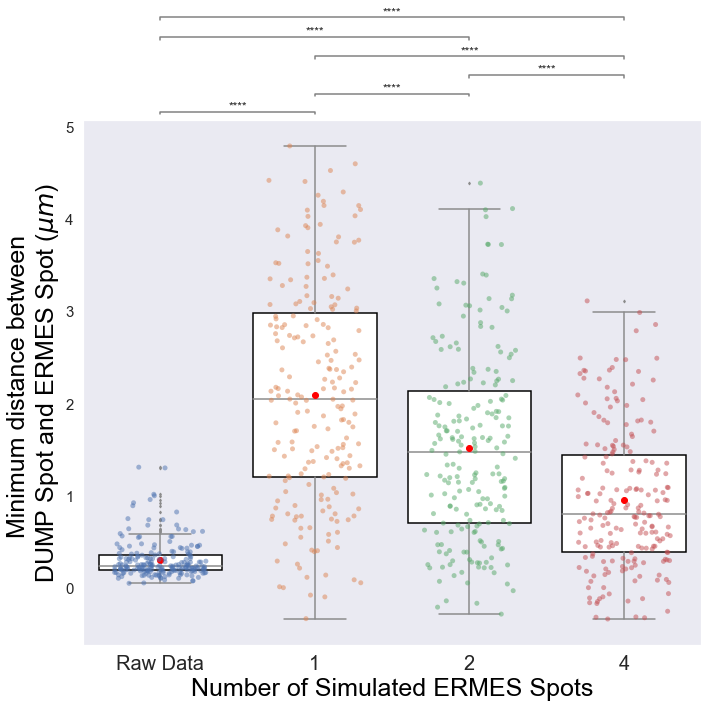

In [28]:
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

dataset_statslist = list(itertools.combinations(set(expanded2DRealData.ntarget.unique()), r = 2))
sns.set(rc={'figure.figsize':(10,10)})
sns.set_style("dark")
ax = sns.boxplot(y = 'minDist', 
                    x = 'ntarget', 
                    data = expanded2DRealData, 
                    fliersize = 2,
                    color = '#d3d9fd',
                    showmeans = True,
                    meanprops={"marker" : ".",
                               "markerfacecolor" : "red", 
                               "markeredgecolor" : "red",
                               "markersize" : 12})
ax = sns.stripplot(y = 'minDist', 
                    x = 'ntarget', 
                    data = expanded2DRealData, 
                    jitter = 0.3,
                    alpha = 0.5)
# iterate over boxes
for i,box in enumerate(ax.artists):
    box.set_edgecolor('black')
    box.set_facecolor('white')
add_stat_annotation(ax, 
                    data=expanded2DRealData, 
                    y = 'minDist', 
                    x = 'ntarget', 
                    box_pairs=dataset_statslist,
                    line_height = 0.005,
                    line_offset=0.01,
                    color='0.5',
                    test='Mann-Whitney', 
                    text_format='star',
                    text_offset=0.5,
                    loc='outside', 
                    verbose=0, 
#                     comparisons_correction='bonferroni',
                    use_fixed_offset = True)

plt.xticks(fontsize = BIGFONTSIZE, rotation=0)
plt.yticks(fontsize = MIDFONTSIZE)
plt.xlabel('Number of Simulated ERMES Spots', fontdict = MIDFONT)
plt.ylabel('Minimum distance between \nDUMP Spot and ERMES Spot ($\mu m$)', fontdict = MIDFONT)
plt.savefig('qq_exptData/boxplot_2DRealData.pdf', format='pdf')

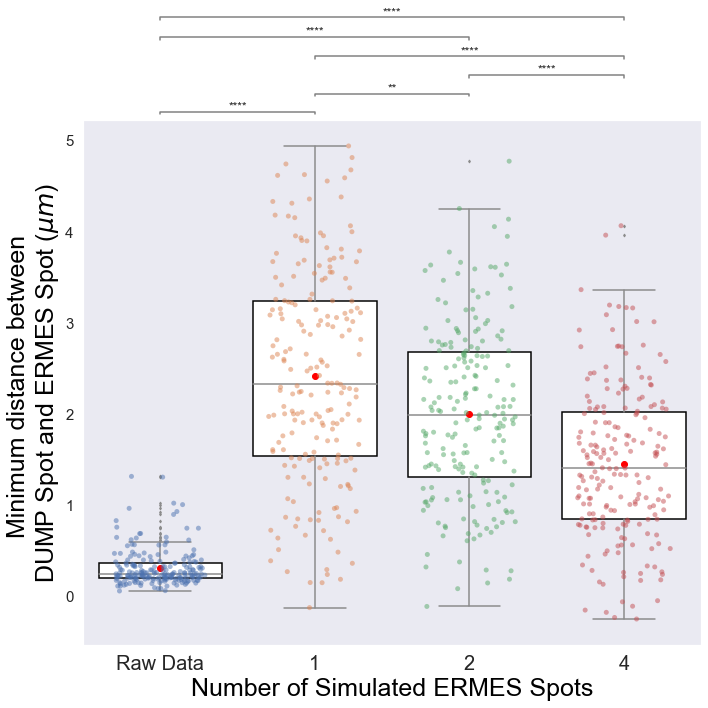

In [29]:
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

dataset_statslist = list(itertools.combinations(set(expanded3DRealData.ntarget.unique()), r = 2))
sns.set(rc={'figure.figsize':(10,10)})
sns.set_style("dark")
ax = sns.boxplot(y = 'minDist', 
                    x = 'ntarget', 
                    data = expanded3DRealData, 
                    fliersize = 2,
                    color = '#d3d9fd',
                    showmeans = True,
                    meanprops={"marker" : ".",
                               "markerfacecolor" : "red", 
                               "markeredgecolor" : "red",
                               "markersize" : 12})
ax = sns.stripplot(y = 'minDist', 
                    x = 'ntarget', 
                    data = expanded3DRealData, 
                    jitter = 0.3,
                    alpha = 0.5)
# iterate over boxes
for i,box in enumerate(ax.artists):
    box.set_edgecolor('black')
    box.set_facecolor('white')
add_stat_annotation(ax, 
                    data=expanded3DRealData, 
                    y = 'minDist', 
                    x = 'ntarget', 
                    box_pairs=dataset_statslist,
                    line_height = 0.005,
                    line_offset=0.01,
                    color='0.5',
                    test='Mann-Whitney', 
                    text_format='star',
                    text_offset=0.5,
                    loc='outside', 
                    verbose=0, 
#                     comparisons_correction='bonferroni',
                    use_fixed_offset = True)

plt.xticks(fontsize = BIGFONTSIZE, rotation=0)
plt.yticks(fontsize = MIDFONTSIZE)
plt.xlabel('Number of Simulated ERMES Spots', fontdict = MIDFONT)
plt.ylabel('Minimum distance between \nDUMP Spot and ERMES Spot ($\mu m$)', fontdict = MIDFONT)
plt.savefig('qq_exptData/boxplot_3DRealData.pdf', format='pdf')